In [122]:
import requests
import json
from bs4 import BeautifulSoup
headers = {
 'User-Agent':'Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/52.0.2743.116 Safari/537.36'   
}
res  = requests.get('https://rent.591.com.tw/house-rentSale.html?type=1&search_type=kind&search_val=1', headers = headers)
soup = BeautifulSoup(res.text, 'html.parser')


In [124]:
areaList = []
for area in  soup.select('li.area.rentByArea'):
    #print area
    arealist.append(area.text.strip().strip(u'坪'))

pricelist = []
for price in  soup.select('.price'):
    pricelist.append(price.text.strip().strip(u'元'))

for price, area in zip(pricelist, arealist):
    print price, area

90,000 71.9
56,000 40
48,600 56.5
120,000 99
25,000 30.8
30,000 30
28,000 23
29,000 12
23,000 60
100,000 38.7
30,000 23
60,000 34.7
69,000 54.3
29,998 25.6
32,000 17.6
50,000 26.6
30,000 27
35,000 18
42,000 50.3
59,800 32


## 591 房價預測

In [125]:
import pandas 
df  = pandas.read_csv('C:\\Users\\Student\\house_rental.csv')
df.head()

,Unnamed: 0,Sqft,Floor,TotalFloor,Bedroom,Living.Room,Bathroom,Price
0,1,1177.698,2,7,2,2,2,62000
1,2,2134.800,5,7,4,2,2,78000
2,3,1138.560,5,7,2,2,1,58000
3,4,1458.780,2,7,3,2,2,45000
4,5,967.776,11,14,3,2,2,45000


In [129]:
df.corr()

,Unnamed: 0,Sqft,Floor,TotalFloor,Bedroom,Living.Room,Bathroom,Price
Unnamed: 0,1.000000,-0.065182,-0.021299,-0.039687,-0.008638,-0.027035,-0.007877,-0.077512
Sqft,-0.065182,1.000000,0.143249,0.304515,0.615608,0.455940,0.728869,0.825514
Floor,-0.021299,0.143249,1.000000,0.564221,0.023986,-0.023563,0.099772,0.244553
TotalFloor,-0.039687,0.304515,0.564221,1.000000,0.067298,0.029373,0.146132,0.333631
Bedroom,-0.008638,0.615608,0.023986,0.067298,1.000000,0.526532,0.643083,0.467059
Living.Room,-0.027035,0.455940,-0.023563,0.029373,0.526532,1.000000,0.546826,0.328788
Bathroom,-0.007877,0.728869,0.099772,0.146132,0.643083,0.546826,1.000000,0.605542
Price,-0.077512,0.825514,0.244553,0.333631,0.467059,0.328788,0.605542,1.000000


Populating the interactive namespace from numpy and matplotlib


`%matplotlib` prevents importing * from pylab and numpy


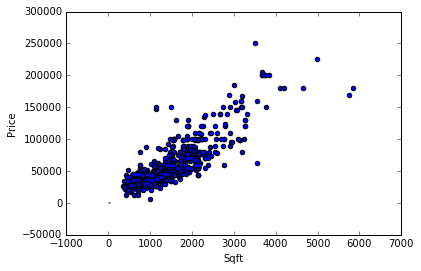

In [126]:
%pylab inline
# Plot the data
plt.scatter(df.Sqft, df.Price)
plt.plot([0, 50], [0, 50], '--k')
plt.xlabel('Sqft')
plt.ylabel('Price')

In [88]:
from sklearn.linear_model import LinearRegression
clf = LinearRegression()
clf.fit(df[['Sqft']], df.Price)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [89]:
clf.predict(3000) # predicted 是我的預測結果

array([ 118428.14450698])

## 波士頓房價預測

In [83]:
# Load Boston Dataset
from sklearn.datasets import load_boston
data = load_boston()
print data.keys()

['data', 'feature_names', 'DESCR', 'target']


In [61]:
print data.DESCR

Boston House Prices dataset

Notes
------
Data Set Characteristics:  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive
    
    :Median Value (attribute 14) is usually the target

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pupil-teacher ratio by town
      

## 分成訓練與測試資料集

In [62]:
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data.data, data.target)

In [63]:
data.data.shape

(506L, 13L)

In [64]:
X_train.shape # use 379 data to build a model

(379L, 13L)

In [65]:
y_train.shape

(379L,)

In [66]:
X_test.shape # use 127 data to test the model

(127L, 13L)

In [67]:
y_test.shape

(127L,)

## 建立模型

In [68]:
from sklearn.linear_model import LinearRegression
clf = LinearRegression()
clf.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

## 房價預測

In [70]:
predicted = clf.predict(X_test) # predicted 是我的預測結果

In [72]:
predicted

array([ 19.95242864,   8.99953568,  21.30644353,  36.25774205,
        21.37576813,  29.29189497,  27.83596799,  13.96046628,
        35.16864464,  38.62585006,  29.64607339,  30.5658755 ,
        33.04568662,  35.27389022,  27.59273171,  14.72807712,
        17.75284774,  27.62373617,  35.90924857,  17.4789049 ,
        30.41103997,  25.15122757,  19.8652385 ,  19.24345562,
        22.9084639 ,  41.92319339,  24.03478352,  13.64368982,
        23.49612087,  17.59170115,  35.47482842,  15.43937936,
        21.84834764,  24.91227587,  40.59764712,  25.55644095,
        17.37369781,  32.01467198,  32.52485152,  18.65478704,
        26.72238085,  31.01081897,  40.86810654,  21.39673133,
        37.14583289,  10.48138491,  20.67913037,  32.1303555 ,
        37.42590203,  15.24309576,  19.70385788,  20.08900726,
        16.97954005,  26.72393666,  25.60496263,  18.99299898,
        34.84747419,  20.9458473 ,   5.54389445,  10.56492363,
        23.45067607,  19.18359771,  15.53043066,  25.46

In [73]:
#真實房價
expected = y_test
expected

array([ 19.5,   7. ,  22. ,  33.3,  22. ,  22.5,  36.2,  13.1,  33.4,
        21.9,  23. ,  30.5,  50. ,  33.1,  24.5,  15. ,  14.5,  25. ,
        35.2,  17.1,  32.7,  18.5,  18.8,  19.9,  22.7,  48.5,  21.9,
        13.5,  22.4,  22.5,  36.5,  15.6,  20.3,  22.9,  46. ,  23.3,
        13.4,  29. ,  31.5,  18.9,  23.9,  30.7,  50. ,  21.2,  48.3,
         8.3,  23.1,  31.6,  44. ,  16.6,  15.2,  23. ,  10.2,  22.1,
        22.2,  18.5,  34.6,  16.8,   8.8,  23.1,  20.1,  14.6,   8.4,
        24.2,  24.5,  23.9,  19.3,  27.5,  18.6,  25.3,  50. ,  19.6,
         7.4,  36.2,  25. ,  20.9,  19.7,  41.7,  26.4,  18.4,  13.6,
        17.8,  24.8,  23. ,  20.4,  16. ,  23.5,  21. ,  14.1,  21.4,
        21.4,  29.8,  21.2,  19.4,  35.1,  17.5,  34.9,  37.2,  24.1,
        21.6,  18.8,  29.8,  20. ,  23.1,  14.3,  14.4,  26.5,  21.7,
        17.3,  21.8,  16.5,  29.4,  16.2,  30.3,  18.2,  14.5,  21.7,
        12. ,  23.8,  11.3,  22.2,  13.8,  24.3,  18.2,  19.3,  27.1,  19.4])

Populating the interactive namespace from numpy and matplotlib
MSE: 4.33796125669


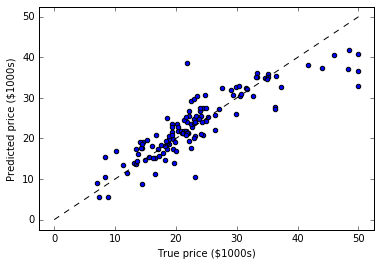

In [130]:
%pylab inline
# Plot the data
plt.scatter(expected, predicted)
plt.plot([0, 50], [0, 50], '--k')
plt.axis('tight')
plt.xlabel('True price ($1000s)')
plt.ylabel('Predicted price ($1000s)')

# Compute Mean Square Error
print "MSE:", np.sqrt(np.mean((predicted - expected) ** 2))

# 定期存款預測

## 讀取資料

In [133]:
import pandas as pd # alias, 使用pd 操作pandas 功能
df = pd.read_csv("C:\\Users\\Student\\bank-additional-full.csv", sep = ';') # 將csv 讀取至 DataFrame

In [135]:
df.head() # 取出前五行的資料

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


## 資料前處理

In [138]:
# 將預測的目標 從 yes, no 變成 1,0
df['y'].replace('no', 0, inplace = True)
df['y'].replace('yes', 1, inplace = True)

In [139]:
df['y'].head()

0    0
1    0
2    0
3    0
4    0
Name: y, dtype: int64

In [141]:
df['y'].unique()

array([0, 1], dtype=int64)

In [142]:
# 類別資料
cat_var = ['job','marital','education',
              'default','housing','loan',
              'contact','month','day_of_week',
              'poutcome',]
# 數值資料
num_var = ['age','duration','campaign','pdays','previous','emp.var.rate',
           'cons.price.idx','cons.conf.idx','euribor3m','nr.employed',]

In [143]:
# 預測標的 => bank_df
bank_df = df['y']
bank_df.head()

0    0
1    0
2    0
3    0
4    0
Name: y, dtype: int64

In [147]:
df['marital'].unique()

array(['married', 'single', 'divorced', 'unknown'], dtype=object)

In [149]:
#利用get_dummies 轉換我們的欄位資訊
pd.get_dummies(df['marital']).head()

,divorced,married,single,unknown
0,0.0,1.0,0.0,0.0
1,0.0,1.0,0.0,0.0
2,0.0,1.0,0.0,0.0
3,0.0,1.0,0.0,0.0
4,0.0,1.0,0.0,0.0


In [153]:
#pd.get_dummies(df['marital']).head()
#bank_df.head()
pd.concat([bank_df,pd.get_dummies(df['marital'])],axis=1).head()

,y,divorced,married,single,unknown
0,0,0.0,1.0,0.0,0.0
1,0,0.0,1.0,0.0,0.0
2,0,0.0,1.0,0.0,0.0
3,0,0.0,1.0,0.0,0.0
4,0,0.0,1.0,0.0,0.0


In [154]:
# 把類別資料展開
for var in cat_var:
    bank_df = pd.concat([bank_df,pd.get_dummies(df[var])],axis=1)
bank_df.head()


,y,admin.,blue-collar,entrepreneur,housemaid,management,retired,self-employed,services,student,...,oct,sep,fri,mon,thu,tue,wed,failure,nonexistent,success
0,0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


In [155]:
# 合併數值資料    
bank_df = pd.concat([bank_df,df[num_var]],axis=1)

In [156]:
bank_df.head()

,y,admin.,blue-collar,entrepreneur,housemaid,management,retired,self-employed,services,student,...,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
0,0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,56,261,1,999,0,1.1,93.994,-36.4,4.857,5191.0
1,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,57,149,1,999,0,1.1,93.994,-36.4,4.857,5191.0
2,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,37,226,1,999,0,1.1,93.994,-36.4,4.857,5191.0
3,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,40,151,1,999,0,1.1,93.994,-36.4,4.857,5191.0
4,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,56,307,1,999,0,1.1,93.994,-36.4,4.857,5191.0


In [157]:
bank_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 64 columns):
y                      41188 non-null int64
admin.                 41188 non-null float64
blue-collar            41188 non-null float64
entrepreneur           41188 non-null float64
housemaid              41188 non-null float64
management             41188 non-null float64
retired                41188 non-null float64
self-employed          41188 non-null float64
services               41188 non-null float64
student                41188 non-null float64
technician             41188 non-null float64
unemployed             41188 non-null float64
unknown                41188 non-null float64
divorced               41188 non-null float64
married                41188 non-null float64
single                 41188 non-null float64
unknown                41188 non-null float64
basic.4y               41188 non-null float64
basic.6y               41188 non-null float64
basic.9y           

### train_test_split 範例

In [159]:
X, y = np.arange(10).reshape((5, 2)), range(5)
X

array([[0, 1],
       [2, 3],
       [4, 5],
       [6, 7],
       [8, 9]])

In [160]:
y

[0, 1, 2, 3, 4]

In [161]:
X_train, X_test, y_train, y_test = train_test_split(X,y)

In [162]:
X_train

array([[8, 9],
       [4, 5],
       [0, 1]])

In [163]:
X_test

array([[6, 7],
       [2, 3]])

In [164]:
y_train

[4, 2, 0]

In [165]:
y_test

[3, 1]

## 分為訓練與測試資料集

In [166]:
from sklearn.cross_validation import train_test_split
# X => Feature, y => Target
?train_test_split(bank_df.drop('y', axis = 1), bank_df['y'])
X_train, X_test, y_train, y_test = train_test_split(bank_df.drop('y', axis = 1), bank_df['y'])

In [172]:
print bank_df.shape
print X_train.shape
print X_test.shape

print y_train.shape
print y_test.shape

(41188, 64)
(30891, 63)
(10297, 63)
(30891L,)
(10297L,)


## 建立模型

In [221]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(random_state=0)
#clf.fit(X_train, y_train)

from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier()



from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators=201)

clf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=201, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

## 產生預測結果

In [222]:
y_pred = clf.predict(X_test)

In [223]:
y_pred

array([0, 0, 0, ..., 1, 0, 0], dtype=int64)

In [224]:
from sklearn.metrics import classification_report
print classification_report(y_test, y_pred)

             precision    recall  f1-score   support

          0       0.94      0.97      0.95      9137
          1       0.64      0.48      0.55      1160

avg / total       0.90      0.91      0.91     10297



In [225]:
from sklearn.metrics import confusion_matrix
print confusion_matrix(y_test, y_pred)

[[8827  310]
 [ 602  558]]


## 交叉驗證

In [226]:
from sklearn.cross_validation import cross_val_score
#?cross_val_score(clf, X_train, y_train)
cross_val_score(clf, X_train, y_train, cv = 3)

array([ 0.91327571,  0.91084782,  0.91453822])

## ROC Curve

In [227]:
probas_ = clf.fit(X_train, y_train).predict_proba(X_test)
probas_[:, 1]

array([ 0.        ,  0.38308458,  0.        , ...,  0.76616915,
        0.        ,  0.21890547])

In [228]:
from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds = roc_curve(y_test, probas_[:, 1])
roc_auc = auc(fpr, tpr)
print("Area under the ROC curve : %f" % roc_auc)

Area under the ROC curve : 0.942100


In [229]:
print fpr, tpr, thresholds

[  0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   1.09445113e-04   1.09445113e-04   1.09445113e-04   3.28335340e-04
   3.28335340e-04   3.28335340e-04   4.37780453e-04   5.47225566e-04
   5.47225566e-04   5.47225566e-04   5.47225566e-04   6.56670680e-04
   6.56670680e-04   6.56670680e-04   6.56670680e-04   6.56670680e-04
   6.56670680e-04   9.85006019e-04   1.09445113e-03   1.20389625e-03
   1.31334136e-03   1.53223159e-03   1.64167670e-03   1.64167670e-03
   1.75112181e-03   1.97001204e-03   1.97001204e-03   2.07945715e-03
   2.40779249e-03   2.40779249e-03   2.84557295e-03   3.06446317e-03
   3.28335340e-03   3.61168874e-03   3.83057896e-03   4.04946919e-03
   4.15891430e-03   4.37780453e-03   4.48724964e-03   4.81558498e-03
   5.03447521e-03   5.36281055e-03   5.91003612e-03   6.12892634e-03
   6.45726168e-03   6.89504214e-03   7.33282259e-03   7.98949327e-03
   8.20838350e-03   8.75560906e-03   9.08394440e-03   9.95950531e-03
   1.05067309e-02   1.07256211e-02

In [230]:
import pylab as pl
pl.style.use('fivethirtyeight')
from IPython.core.pylabtools import figsize
figsize(12,5)

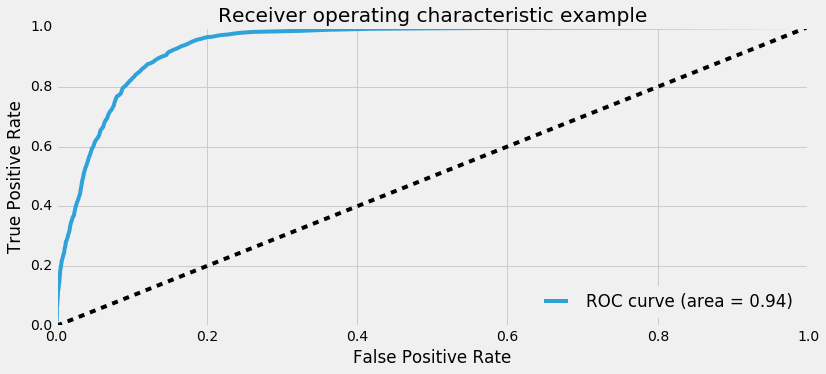

In [231]:

# Plot ROC curve
pl.clf()
pl.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
pl.plot([0, 1], [0, 1], 'k--')
pl.xlim([0.0, 1.0])
pl.ylim([0.0, 1.0])
pl.xlabel('False Positive Rate')
pl.ylabel('True Positive Rate')
pl.title('Receiver operating characteristic example')
pl.legend(loc="lower right")
pl.show()

## 找出最重要的變數

In [233]:
zip(clf.feature_importances_,bank_df.drop('y', axis = 1).keys())

[(0.012149686128256541, 'admin.'),
 (0.0082440705926583781, 'blue-collar'),
 (0.0037330514572595039, 'entrepreneur'),
 (0.0028426676369027316, 'housemaid'),
 (0.0067774594400146762, 'management'),
 (0.0056573584992742048, 'retired'),
 (0.0042124709600525325, 'self-employed'),
 (0.0062359641362255353, 'services'),
 (0.0042453173048253509, 'student'),
 (0.0099737373849476743, 'technician'),
 (0.0036100728866955848, 'unemployed'),
 (0.0016102032002016414, 'unknown'),
 (0.0071842003263063916, 'divorced'),
 (0.012024824064673079, 'married'),
 (0.010834631776759885, 'single'),
 (0.00061306345072368739, 'unknown'),
 (0.0062796356738512461, 'basic.4y'),
 (0.0043530401135280965, 'basic.6y'),
 (0.0074992517839958389, 'basic.9y'),
 (0.010765128865026107, 'high.school'),
 (0.00027143390911481524, 'illiterate'),
 (0.0084846357205206595, 'professional.course'),
 (0.011985865509406418, 'university.degree'),
 (0.0047958328274242774, 'unknown'),
 (0.0057097881072233157, 'no'),
 (0.0054404868361139754, 